# GRASS GIS for remote sensing data processing and analysis

### Workshop at FOSS4G 2022, Florence (Italy)

*Lecturers:* Veronica Andreo, Markus Neteler & Maris Nartiss

*Date:* 2022-08-23

### Foreword

This notebook will demonstrate the use of **GRASS GIS 8.2+** in combination with Python within a Jupyter Notebook environment. We will use GRASS modules and related python libraries that facilitate scripting (`grass.script`) and connection/interaction with Jupyter Notebooks (`grass.jupyter`). 

The workflow that will be demonstrated on this notebook ranges from searching satellite data to time series building and classifying it using machine learning.

### Dependencies

The following dependencies are needed to run the proposed exercises of this notebook:
- sentinelsat
- scikit-learn
- folium

### Table of contents

1. Why Jupyter Notebooks and how to use them?
2. GRASS GIS basics
3. GRASS GIS & Python
4. Getting ready: set paths and variables and download sample data
5. Initialization of GRASS GIS in the Jupyter notebook session
6. Creating an area of interest map
7. Importing geodata into GRASS GIS
8. Sentinel-2 processing overview
9. Computing NDVI
10. Time series data processing
11. Creating an image stack (imagery group)
12. Object recognition with image segmentation
13. Supervised Classification: RandomForest
14. What's next?

## 1. Why Jupyter Notebooks and how to use them?

Jupyter Notebooks are server-client applications that allow code written in a notebook document to be
**edited and executed through a web browser**. They can be run on a local computer (no internet access required) or used to control computations on a remote server accessed via the Internet
([see the documentation](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)).

Jupyter Notebooks can be interactive and they provide the ability to combine live code, explanatory text, and computational results into a single document. 

Jupyter Notebooks are:

* convenient for initial code development (prototyping)
* ideal for code segmentation with the ability to re-run segments
* able to store values of variables from already executed segments.

The notebook can be saved as an executable Python script in addition to the native `.ipynb` format, 
or exported to various documentation formats such as PDF or Sphinx RST with nice styling.

#### Editing and interactive use

Editing a Jupyter Notebook is very easy: in the web browser, you can navigate between text or code
blocks ("cells") using the mouse or keyboard shortcuts (see Menu > Help > Keyboard Shortcuts). You can
execute small code segments cell by cell, save the notebook in its current state, or modify and 
recalculate cells or return them to their previous state. In addition to executable code cells, you 
can use Markdown in documentation cells to make them presentable to others.

## 2. GRASS GIS basics


### Open GRASS for the first time

As of version 8.0, GRASS has modified its startup to make it more user friendly:

![First time launching GRASS 8](https://grass.osgeo.org/grass-stable/manuals/grass_start.png)

From the *Data* catalog tab you can manage several actions and if you do not yet have imported data into the GRASS database, the software creates the directory structure automatically.


### Database

- **GRASS database** (directory with projects): When running GRASS GIS for the first time, a folder named "grassdata" is automatically created. Depending on the operating system, it can be found in `$HOME` (*nix) or `My Documents` (MS Windows).
- **Location** (a project): A "location" is defined by its coordinate reference system (CRS). The location that is automatically created is in WGS84 (EPSG:4326). If you have data in another CRS, you should ideally create a new location.
- **Mapset** (a subproject): Each location can have many "mapsets" to manage different aspects of a project or sub-regions of a project. When creating a new Location, GRASS GIS automatically creates a special Mapset called *PERMANENT* where the central project data (e.g., base maps, road network, dem, etc) can be stored. 
    
![GRASS GIS database](https://grass.osgeo.org/grass-stable/manuals/grass_database.png)

More info: https://grass.osgeo.org/grass-stable/manuals/grass_database.html


### Computational region

Another fundamental concept of GRASS GIS (and very useful when working with raster data) is that of the **computational region**. It refers to the boundary configuration of the analysis area and spatial resolution (raster). The **computational region** can be defined and modified with the command [g.region](https://grass.osgeo.org/grass-stable/manuals/g.region.html) to the extent of a vector map, a raster or manually to some area of interest. The output raster maps *(output)* will have an extent and spatial resolution equal to the computational region, while vector maps are always processed at their original extent.

![Computational region](https://gitlab.com/veroandreo/maie-procesamiento/-/raw/taller-grass-online/assets/img/region.png)

For more details, see the wiki on [Computational Region](https://grasswiki.osgeo.org/wiki/Computational_region)

### Modules and extensions

GRASS has more than [500 modules](https://grass.osgeo.org/grass-stable/manuals/full_index.html) for the most varied tasks, but with a clear organization:

| Prefix                                                               | Function class   | Type of command                     | Example
|--------------------------------------------------------------------- |:---------------- |:----------------------------------- |:-------------------------------------------------------------------------------------------------------------------
| [g.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#g)    | general          | general data management             | [g.rename](https://grass.osgeo.org/grass-stable/manuals/g.rename.html): renames map
| [d.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#d)    | display          | graphical output                    | [d.rast](https://grass.osgeo.org/grass-stable/manuals/d.rast.html): display raster map 
| [r.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#r)    | raster           | raster processing                   | [r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html): map algebra
| [v.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#r)    | vector           | vector processing                   | [v.clean](https://grass.osgeo.org/grass-stable/manuals/v.clean.html): topological cleaning
| [i.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#i)    | imagery          | imagery processing                  | [i.pca](https://grass.osgeo.org/grass-stable/manuals/i.pca.html): Principal Components Analysis on imagery group
| [r3.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#r3)  | voxel            | 3D raster processing                | [r3.stats](https://grass.osgeo.org/grass-stable/manuals/r3.stats.html): voxel statistics
| [db.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#db)  | database         | database management                 | [db.select](https://grass.osgeo.org/grass-stable/manuals/db.select.html): select value(s) from table
| [ps.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#ps)  | postscript       | PostScript map creation             | [ps.map](https://grass.osgeo.org/grass-stable/manuals/ps.map.html): PostScript map creation
| [t.\*](https://grass.osgeo.org/grass-stable/manuals/full_index.html#t)    | temporal         | space-time datasets                 | [t.rast.aggregate](https://grass.osgeo.org/grass-stable/manuals/t.rast.aggregate.html): raster time series aggregation

Extensions or **add-ons** can be installed from the
[central GitHub repository](https://grass.osgeo.org/grass-stable/manuals/addons/) 
or from *other users' GitHub* (or other similar repositories) using the command 
[g.extension](https://grass.osgeo.org/grass-stable/manuals/g.extension.html). For example:

```bash
 # install an extension from the GRASS GIS repository
 g.extension extension=r.hants
 
 # install an extension from another GitHub repository
 g.extension extension=r.in.sos \
   url=https://github.com/pesekon2/GRASS-GIS-SOS-tools/tree/master/sos/r.in.sos
``` 


## 3. GRASS & Python

### Python package `grass.script`

The **grass.script** or GRASS GIS Python Scripting Library provides functions for calling GRASS modules within Python scripts as threads. The most commonly used functions include:

- `run_command`: used when the output of the modules is a raster or vector, no text type output is expected
- `read_command`: used when the output of the modules is a text
- `parse_command`: used with modules whose output can be converted to `key=value` pairs
- `write_command`: used with modules that expect text input, either in the form of a file or from stdin

It also provides several wrapper functions for frequently used modules:

- To get info from a raster, script.raster.raster_info() is used: `gs.raster_info('dsm')`
- To get info of a vector, script.vector.vector_info() is used: `gs.vector_info('roads')`
- To list the raster in a location, script.core.list_grouped() is used: `gs.list_grouped(type=['raster'])`
- To obtain the computational region, script.core.region() is used: `gs.region()`

More info: https://grass.osgeo.org/grass-stable/manuals/libpython/script_intro.html

### Python package `grass.jupyter`

The **grass.jupyter** library improves the integration of GRASS and Jupyter, and provides different classes to visualize maps.

- `init`: starts a GRASS session and sets up necessary environment variables
- `Map`: 2D rendering
- `Map3D`: 3D rendering
- `InteractiveMap`: interactive visualization with folium
- `TimeSeriesMap`: visualization for spatio-temporal data

More info: https://grass.osgeo.org/grass-stable/manuals/libpython/grass.jupyter.html


## 4. Getting ready: set paths and variables and download sample data

For the ease of working in this notebook, we define some session variables.

In [1]:
import os

# data directory
homedir=os.path.join(os.path.expanduser('~'), "foss4g_grass4rs")

# GRASS GIS related variables, adapt path to your's
grassdata=os.path.join(homedir, "grassdata")
location="nc_spm_08_grass7"
mapset="PERMANENT"

In [48]:
# be sure to overwrite existing data when re-running a Jupyter notebook cell
GRASS_OVERWRITE=1

# Sentinel-2 related directories, adapt path to your's
s2_data=os.path.join(homedir, "sentinel")
s2_timestamps=os.path.join(homedir, "sentinel-timestamps.txt")

# create directories if not already existing
#!mkdir -p $grassdata
#!mkdir -p $s2_data

# the variables are also accessible via Python
print(homedir)

# list content
!ls -la $homedir

/home/veroandreo/foss4g_grass4rs
total 144344
drwxrwxr-x   4 veroandreo veroandreo      4096 Jul 14 16:28 .
drwx------. 56 veroandreo veroandreo     20480 Jul 14 16:28 ..
drwxrwxr-x   3 veroandreo veroandreo      4096 Jul 14 16:41 grassdata
-rw-rw-r--   1 veroandreo veroandreo 147766048 Oct 30  2015 nc.zip
drwxrwxr-x   2 veroandreo veroandreo      4096 Jul 14 15:12 sentinel
-rw-r--r--   1 veroandreo veroandreo        22 Jan 27  2020 sentinel_credentials


Next we check the GRASS GIS installation:

In [2]:
!grassdev --version

GRASS GIS 8.3.dev

Geographic Resources Analysis Support System (GRASS) is Copyright,
1999-2022 by the GRASS Development Team, and licensed under terms of the
GNU General Public License (GPL) version >=2.
 
This GRASS GIS 8.3.dev release is coordinated and produced by
the GRASS Development Team with contributions from all over the world.

This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
General Public License for more details.



Next, if not already there, we download North Carolina location and unpack it within `homedir`

In [5]:
# download NC sample data into target directory homedir
!wget -c https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.zip -O $homedir/nc.zip

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/veroandreo/.wget-hsts'. HSTS will be disabled.
--2022-07-14 15:15:35--  https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.zip
Resolving grass.osgeo.org (grass.osgeo.org)... 140.211.15.9
Connecting to grass.osgeo.org (grass.osgeo.org)|140.211.15.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147766048 (141M) [application/zip]
Saving to: ‘/home/veroandreo/foss4g_grass4rs/nc.zip’

/home/veroandreo/fo 100%[===================>] 140.92M  6.33MB/s    in 34s     

2022-07-14 15:16:10 (4.11 MB/s) - ‘/home/veroandreo/foss4g_grass4rs/nc.zip’ saved [147766048/147766048]



In [6]:
# unpack sample dataset into target directory homedir
!unzip -o -q -d $grassdata $homedir/nc.zip

print("List uploaded file(s) in target directory homedir:")
!ls $homedir

List uploaded file(s) in target directory homedir:
grassdata  nc.zip  sentinel


In [ ]:
# Here, we need to do something similar for the Sentinel scenes that Maris prepared and extract land use from OSM...
# Any other aux data?

## 5. Imports and initialization of GRASS GIS

In [3]:
import subprocess
import sys
import pandas as pd

# Ask GRASS GIS where its Python packages are to be able to start it from the notebook
sys.path.append(
    subprocess.check_output(["grassdev", "--config", "python_path"], text=True).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
session = gj.init(grassdata, location, mapset)

In [4]:
# Show current GRASS GIS settings
print(gs.read_command("g.gisenv"))

GISDBASE='/home/veroandreo/foss4g_grass4rs/grassdata';
LOCATION_NAME='nc_spm_08_grass7';
MAPSET='PERMANENT';



Before we start, we list the elements in the mapset `PERMANENT`. If we only want to see the raster or vector type elements, just change the `type` option in the following command. As you can see, since the output is of text type, we use `read_command()`.

In [5]:
# List vector elements in the PERMANENT mapset
print(gs.read_command("g.list", type="vector", mapset="."))

P079214
P079215
P079218
P079219
boundary_county
boundary_municp
bridges
busroute1
busroute11
busroute6
busroute_a
busroutesall
busstopsall
census_wake2000
censusblk_swwake
comm_colleges
elev_lid792_bepts
elev_lid792_cont1m
elev_lid792_randpts
elev_lidrural_mrpts
elev_lidrural_mrptsft
elev_ned10m_cont10m
firestations
geodetic_pts
geodetic_swwake_pts
geology
geonames_NC
geonames_wake
hospitals
lakes
nc_state
overpasses
poi_names_wake
precip_30ynormals
precip_30ynormals_3d
railroads
roadsmajor
schools_wake
soils_general
soils_wake
streams
streets_wake
swwake_10m
urbanarea
usgsgages
zipcodes_wake



Next, we create a new mapset or project, where we will work with this notebook and import Sentinel-2 data.

In [7]:
# Create a new mapset and switch to it
gs.run_command("g.mapset", mapset="sentinel2", flags="c")

In [9]:
# Check current mapset
print(gs.read_command("g.mapset", flags="p"))

sentinel2



In [8]:
# Print accessible mapsets within the location
print(gs.read_command("g.mapsets", flags="p"))

sentinel2 PERMANENT



## 6. Creating an area of interest map

To proceed to search for sentinel images, we are going to use a map of urban areas that we have in the PERMANENT mapset. Since we are interested in the city of Raleigh, we use the function v.extract to create a new polygon corresponding to that urban area only. Note that in this case we use `run_command()`.

In [15]:
# Check `urbanarea` attributes
gs.vector_db_select('urbanarea')['values']

{1: ['1', '1', '29305', 'Farmville', 'UC'],
 2: ['2', '2', '92404', 'Washington', 'UC'],
 3: ['3', '3', '35380', 'Greenville', 'UA'],
 4: ['4', '4', '46315', 'La Grange', 'UC'],
 5: ['5', '5', '45397', 'Kinston', 'UC'],
 6: ['6', '6', '61840', 'New Bern', 'UC'],
 7: ['7', '7', '37675', 'Havelock', 'UC'],
 8: ['8', '8', '62812', 'Newport', 'UC'],
 9: ['9', '9', '59194', 'Morehead City', 'UC'],
 10: ['10', '10', '27415', 'Emerald Isle', 'UC'],
 11: ['11', '11', '42400', 'Jacksonville', 'UA'],
 12: ['12', '12', '40510', 'Hubert', 'UC'],
 13: ['13', '13', '22258', 'Danville', 'UA'],
 14: ['14', '14', '59815', 'Mount Airy', 'UC'],
 15: ['15', '15', '26092', 'Eden', 'UC'],
 16: ['16', '16', '60706', 'Murfreesboro', 'UC'],
 17: ['17', '17', '75448', 'Roanoke Rapids', 'UC'],
 18: ['18', '18', '55792', 'Mayodan', 'UC'],
 19: ['19', '19', '76501', 'Roxboro', 'UC'],
 20: ['20', '20', '74152', 'Reidsville', 'UC'],
 21: ['21', '21', '38269', 'Henderson', 'UC'],
 22: ['22', '22', '66592', 'Oxford', 

In [15]:
# Extract Raleigh urban area from `urbanarea` vector map
gs.run_command("v.extract", 
               input="urbanarea", 
               where="NAME == 'Raleigh'", 
               output="urban_area_raleigh",
               overwrite=True)

In [16]:
# show attributes
gs.vector_db_select('urban_area_raleigh')['values']

{55: ['55', '55', '73261', 'Raleigh', 'UA']}

We set the computational region to the boundaries of the newly created vector. This will be the bounding box we'll use for the sentinel scenes search.

In [17]:
# Set the computational region to the extent of Cordoba urban area
region = gs.parse_command("g.region", vector="urban_area_raleigh", flags="g")
region

{'projection': '99',
 'zone': '0',
 'n': '253254.98219891',
 's': '199163.75719891',
 'w': '617413.08762649',
 'e': '661204.57262649',
 'nsres': '500.84467593',
 'ewres': '497.63051136',
 'rows': '108',
 'cols': '88',
 'cells': '9504'}

We now use the new `grass.jupyter` functions to display the newly obtained vector over the OpenStreetMap basemap.

In [19]:
# Display newly created vector
raleigh_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
raleigh_map.add_vector("urban_area_raleigh")
raleigh_map.add_layer_control(position = "bottomright")
raleigh_map.show()

## 7. Sentinel-2 processing overview

There are plenty of libraries or tools which allow downloading
Sentinel products from [Copernicus Open Access Hub](https://scihub.copernicus.eu/).

For GRASS GIS there is the [i.sentinel](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.html) toolbox that facilitates searching, filtering, downloading, importing and pre-processing Sentinel data, especially Sentinel 2, from a GRASS GIS session. It consists of six GRASS addon modules:

* [i.sentinel.download](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.download.html)
* [i.sentinel.import](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.import.html)
* [i.sentinel.preproc](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.preproc.html)
* [i.sentinel.mask](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.mask.html)
* [i.sentinel.coverage](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.coverage.html)
* [i.sentinel.parallel.download](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.parallel.download.html)

Addons modules can be easily installed via [g.extension](https://grass.osgeo.org/grass-stable/manuals/addons/g.extension.html).

In [21]:
# install extension
gs.run_command("g.extension", extension="i.sentinel")

### Sentinel 2 data search and download

[Sentinel-2 L2A products](https://www.sentinel-hub.com/blog/sentinel-2-l2a-products-available-sentinel-hub)
will be used to avoid computing atmospheric corrections. Let’s
search for the latest available product by means of [i.sentinel.download](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.download.html). Setting the `-l` flag, the result will only
be printed. The download procedure will be performed later. In order to
search and download Sentinel products from the Copernicus Open Access Hub,
you have to create an account first. See the manual page of [i.sentinel.download](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.download.html) module for details. Upload or create a new text
file in the data directory (homedir) named `esa_credentials.txt` containing two lines (username and password).

#### Note

To get username and password you need to register at the [Copernicus Open Access Hub](https://scihub.copernicus.eu/), see the [Register new account](https://scihub.copernicus.eu/dhus/#/self-registration) page for signing up.

In [ ]:
# list available Sentinel-2 L2A scenes for AOI
# note that we use parse_command() in order to intercept the output for display in the browser
gs.parse_command("i.sentinel.download", flags="l", map="tile_5606_1km", producttype="S2MSI2A",
               settings=homedir+"/esa_credentials.txt")

This should result into something like:

```bash
c48f04f2-81d1-4fcc-bb32-97405925d6d4 ... 2022-05-25T09:05:59Z  0% S2MSI2A 1.02 GB
4720c028-0163-4aba-92a9-3e53fc4047c5 ... 2022-05-15T09:05:59Z  1% S2MSI2A 985.18 MB
0eb10137-025e-402b-a050-7e2919602e61 ... 2022-05-15T09:05:59Z  1% S2MSI2A 1.01 GB
...
```

By default the module returns products for the last 60 days. Let’s change
the search period setting `start` and `end` options. We will also
limit products by `clouds` coverage percentage threshold and `sort` products
by ingestion date.


In [ ]:
gs.parse_command("i.sentinel.download", flags="l", map="tile_5606_1km",
               producttype="S2MSI2A", settings=homedir+"/esa_credentials.txt",
               start="2022-02-01", end="2022-05-31", clouds="5",
               sort="ingestiondate")

This should result in:

```bash
a119f7b0-0020-4229-b0fb-efd0f5bdfb37 ... 2022-02-19T09:10:21Z  0% S2MSI2A 1.02 GB
d6e4253d-80e3-49ff-899e-cee19a0ba935 ... 2022-02-19T09:10:21Z  0% S2MSI2A 998.70 MB
cdb37429-1c5d-4c67-8ceb-b6c68a33eef6 ... 2022-03-26T09:06:09Z  0% S2MSI2A 1.02 GB
...
```

#### Tip: If more products have been found, you can limit the amount with the `limit` option.


Let’s download the desired product(s). Just remove the `-l` flag and add the `output` option in order to define the path to the output directory where data should be saved.

In [85]:
# note: s2_data directory and esa_credentials.txt have been defined above

## TO BE SKIPPED, we use pre-downloaded data below!

start_date="2022-02-01"
end_date="2022-06-30"
s2_credentials=os.path.join(homedir, "esa_credentials.txt")

list_prod = gs.read_command("i.sentinel.download", 
                            settings=s2_credentials, 
                            start=start_date, 
                            end=end_date, 
                            producttype="S2MSI2A", 
                            clouds=2, 
                            area_relation="Intersects", 
                            footprints="s2_footprints", 
                            limit=15,
                            sort="ingestiondate",
                            flags="l")

In [82]:
list_prod

'b89cafba-d27c-4084-aa21-d2e83ad6dd99 S2A_MSIL2A_20220209T155411_N0400_R054_T17SPV_20220209T214425 2022-02-09T15:54:11Z  0% S2MSI2A 169.91 MB\nda3cafc9-d28f-4c15-af01-6d6e6a1c1fea S2A_MSIL2A_20220209T155411_N0400_R054_T17SQV_20220209T214425 2022-02-09T15:54:11Z  1% S2MSI2A 1.11 GB\nc1776f00-ccc3-4e0d-892e-337b358d42c0 S2B_MSIL2A_20220214T155239_N0400_R054_T17SQV_20220214T182121 2022-02-14T15:52:39Z  1% S2MSI2A 1.11 GB\nbefc29eb-057d-4c4a-a736-0e2b029eeed1 S2B_MSIL2A_20220214T155239_N0400_R054_T17SPV_20220214T182121 2022-02-14T15:52:39Z  0% S2MSI2A 164.22 MB\nfc49477b-70b0-496f-a646-9d711d7a7766 S2A_MSIL2A_20220219T155311_N0400_R054_T17SPV_20220219T203555 2022-02-19T15:53:11Z  2% S2MSI2A 178.01 MB\n2c41d0b5-228f-42b0-b826-ac9366f5a016 S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812 2022-03-04T16:01:51Z  1% S2MSI2A 832.64 MB\n4598c366-9d63-4a7b-94c5-55bb64d15531 S2A_MSIL2A_20220304T160151_N0400_R097_T17SPV_20220304T215812 2022-03-04T16:01:51Z  0% S2MSI2A 1.14 GB\n852233fe-c4

Let's improve the previous output to make it easier to read and convert it into a pandas data frame.

In [86]:
img_list = []
for line in list_prod.split("\n"):
    img = line.split(" ")
    if len(img) == 8:
        img.pop(3) # remove annoying empty space bc of padding for cloud percentage
    img_list.append(img)

img_list.pop(len(img_list)-1) # remove last empty line

['']

In [87]:
# turn interim list into nice table
df_list = pd.DataFrame(img_list, columns=['uuid', 'scene', 'date', 'cloud', 'product', 'size', 'unit'])
df_list

,uuid,scene,date,cloud,product,size,unit
0,b89cafba-d27c-4084-aa21-d2e83ad6dd99,S2A_MSIL2A_20220209T155411_N0400_R054_T17SPV_2...,2022-02-09T15:54:11Z,0%,S2MSI2A,169.91,MB
1,da3cafc9-d28f-4c15-af01-6d6e6a1c1fea,S2A_MSIL2A_20220209T155411_N0400_R054_T17SQV_2...,2022-02-09T15:54:11Z,1%,S2MSI2A,1.11,GB
2,c1776f00-ccc3-4e0d-892e-337b358d42c0,S2B_MSIL2A_20220214T155239_N0400_R054_T17SQV_2...,2022-02-14T15:52:39Z,1%,S2MSI2A,1.11,GB
3,befc29eb-057d-4c4a-a736-0e2b029eeed1,S2B_MSIL2A_20220214T155239_N0400_R054_T17SPV_2...,2022-02-14T15:52:39Z,0%,S2MSI2A,164.22,MB
4,fc49477b-70b0-496f-a646-9d711d7a7766,S2A_MSIL2A_20220219T155311_N0400_R054_T17SPV_2...,2022-02-19T15:53:11Z,2%,S2MSI2A,178.01,MB
5,2c41d0b5-228f-42b0-b826-ac9366f5a016,S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_2...,2022-03-04T16:01:51Z,1%,S2MSI2A,832.64,MB
6,4598c366-9d63-4a7b-94c5-55bb64d15531,S2A_MSIL2A_20220304T160151_N0400_R097_T17SPV_2...,2022-03-04T16:01:51Z,0%,S2MSI2A,1.14,GB
7,852233fe-c4d1-41aa-b92b-bd874e9760ca,S2A_MSIL2A_20220321T154941_N0400_R054_T17SQV_2...,2022-03-21T15:49:41Z,1%,S2MSI2A,1.12,GB
8,80ac17c8-e9a7-4038-8df6-77cf1350431a,S2A_MSIL2A_20220321T154941_N0400_R054_T17SPV_2...,2022-03-21T15:49:41Z,0%,S2MSI2A,180.83,MB
9,2e7fadfb-1534-4b6e-a2d5-87a53fb0efdc,S2A_MSIL2A_20220403T155821_N0400_R097_T17SPV_2...,2022-04-03T15:58:21Z,1%,S2MSI2A,1.12,GB


In [88]:
# diplay footprints (you may want to zoom out a bit)
fp_map = gj.InteractiveMap(width = 400, use_region=True, tiles="OpenStreetMap")
fp_map.add_vector("s2_footprints")
fp_map.add_layer_control(position = "bottomright")
fp_map.show()

The next step is to download the scene or scenes of interest. For that we use the `i.sentinel.download` but this time without the `l` flag for list. 

As download might take quite some time, we'll skip this part and directly use a set of smaller, ready to import scenes. Still, we leave this here for future reference :)

Go to section **"Importing Sentinel 2 data"**

In [49]:
# download the selected scene (2022-06-17, T15:58:29Z)
gs.run_command("i.sentinel.download", 
               settings=s2_credentials, 
               uuid="cfa30609-5627-4788-b7ff-768e2df99975", 
               output=s2_data)

In [50]:
# import only bands relevant for RGB, NDVI and NDWI
gs.run_command("i.sentinel.import", 
               input=s2_data, 
               pattern_file="*20220617*",
               pattern="B(02_1|03_1|04_1|08_1|8A_2|11_2|12_2)0m", 
               extent="region", # subset import to region extent
               flags="rcsj") # reproject, clouds, shadow, json metadata

In [51]:
# list raster maps
gs.list_grouped(type="raster")['sentinel2']

['T17SQV_20220617T155829_B02_10m',
 'T17SQV_20220617T155829_B03_10m',
 'T17SQV_20220617T155829_B04_10m',
 'T17SQV_20220617T155829_B08_10m',
 'T17SQV_20220617T155829_B11_20m',
 'T17SQV_20220617T155829_B12_20m',
 'T17SQV_20220617T155829_B8A_20m']

In [52]:
# check metadata of some imported bands
gs.raster_info(map="T17SQV_20220617T155829_B03_10m")

{'north': 253260.0,
 'south': 199160.0,
 'east': 661210.0,
 'west': 628250.0,
 'nsres': 10.0,
 'ewres': 10.0,
 'rows': '5410',
 'cols': '3296',
 'cells': '17831360',
 'datatype': 'CELL',
 'ncats': '0',
 'min': 946.0,
 'max': 17936.0,
 'map': 'T17SQV_20220617T155829_B03_10m',
 'maptype': 'raster',
 'mapset': 'sentinel2',
 'location': 'nc_spm_08_grass7',
 'database': '/home/veroandreo/foss4g_grass4rs/grassdata',
 'date': '"Thu Jul 14 17:00:49 2022"',
 'creator': '"veroandreo"',
 'title': '"tmp_T17SQV_20220617T155829_B03_10m"',
 'timestamp': '"17 Jun 2022 16:13:26.670189"',
 'units': '"none"',
 'vdatum': '"none"',
 'semantic_label': 'S2_3',
 'source1': '"S2B_MSIL2A_20220617T155829_N0400_R097_T17SQV_20220618T124528"',
 'source2': '"/home/veroandreo/foss4g_grass4rs/sentinel/S2B_MSIL2A_20220617T155829_N0400_R097_T17SQV_20220618T124528.SAFE/GRANULE/L2A_T17SQV_A027579_20220617T161036/IMG_DATA/R10m/T17SQV_20220617T155829_B03_10m.jp2"',
 'description': '"generated by r.mapcalc"',
 'comments': '"

In [73]:
# set color table to grey
gs.run_command("r.colors", 
               map="T17SQV_20220617T155829_B04_10m,T17SQV_20220617T155829_B03_10m,T17SQV_20220617T155829_B02_10m", 
               color="grey")

# color enhancing for RGB composition
gs.run_command("i.colors.enhance", 
               red="T17SQV_20220617T155829_B04_10m",
               green="T17SQV_20220617T155829_B03_10m", 
               blue="T17SQV_20220617T155829_B02_10m",
               strength=95)

In [67]:
# set region to "elevation" map
gs.run_command("g.region", raster="elevation")

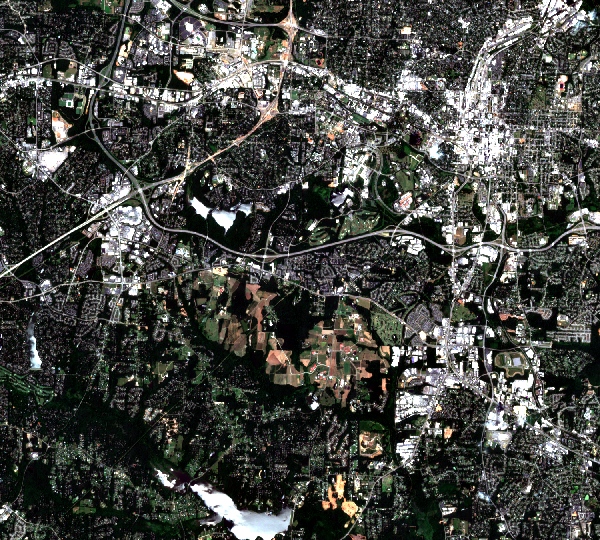

In [74]:
# display the enhanced RGB combination
rgb = gj.Map(use_region=True)
rgb.d_rgb(red="T17SQV_20220617T155829_B04_10m",
          green="T17SQV_20220617T155829_B03_10m", 
          blue="T17SQV_20220617T155829_B02_10m")
rgb.show()

### Importing Sentinel-2 data

Before importing or linking Sentinel-2 data we print a list of
filtered raster files including projection match (second column, 1 for
match, otherwise 0). If the CRS of input data differs from the current location
consider reprojection (`-r`) or creating a new location for import.

*Important*: Data will be imported into the new location by means of the [i.sentinel.import](https://grass.osgeo.org/grass-stable/manuals/addons/i.sentinel.import.html) tool. The command will import **all** Sentinel bands from `input` directory
recursively. Before importing data let’s check content of the input directory by `-p` flag.

In [ ]:
# Check list of pre-downloaded Sentinel-2 scenes, with i.sentinel.import (-p: print)
gs.parse_command("i.sentinel.import", flags="p", input=homedir+"/sentinel")

This should result in (projection match in second column: 1 for match, otherwise 0):

```bash
.../R20m/T34SGH_20210828T090549_B03_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210828T090549_B04_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210828T090549_B8A_20m.jp2 1 (EPSG: 32634)
...
```

In the example below, we limit the S2 data import to the RGB and NIR bands (2, 3, 4, 8A) in 20m spatial resolution by the `pattern` option.

In [ ]:
gs.parse_command("i.sentinel.import", 
                 flags="p", 
                 input=homedir+"/geodata/t34sgh_20_60m", 
                 pattern="B(02|03|04|8A)_20m")

This should result in:

```bash
.../R20m/T34SGH_20210828T090549_B8A_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210828T090549_B04_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210624T090601_B04_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210624T090601_B8A_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210729T090559_B04_20m.jp2 1 (EPSG: 32634)
.../R20m/T34SGH_20210729T090559_B8A_20m.jp2 1 (EPSG: 32634)
```

By default, input data are imported into GRASS data format.
Alternatively, data can be linked if `-l` is given. It is also
useful to import cloud mask vector features by `-c` flag. We also use
`register_output` option to produce a timestamp plain text file
which will be used in [section 07](07.rst).

In [ ]:
# use 2GB of RAM for faster operations, s2_timestamps defined above
# this takes up to a few minutes...
gs.parse_command("i.sentinel.import", 
                 flags="c", 
                 input=homedir+"/geodata/t34sgh_20_60m",
                 pattern="B(02|03|04|8A)_20m", 
                 memory=2000, 
                 register_output=s2_timestamps)

In [ ]:
# print timestamp file for inspection
f = open(s2_timestamps, 'r')
content = f. read()
print(content)
f. close()

#### Semantic labels

A fairly new concept within GRASS is semantic labels. These are especially relevant for satellite imagery as they allow us to identify to which sensor and band a given raster corresponds. These labels are particularly relevant when working with satellite image collections and also when classifying different scenes. We will see it later, but by generating a spectral signature for a given set of bands, it can be re-used to classify another scene as long as the semantic labels are the same.

In [72]:
# print semantic labels
for i in gs.list_grouped(type="raster")['sentinel2']:
    label = gs.raster_info(map=i)['semantic_label']
    print('Map: {}, Semantic label: {}'.format(i,label))

Map: T17SQV_20220617T155829_B02_10m, Semantic label: S2_2
Map: T17SQV_20220617T155829_B03_10m, Semantic label: S2_3
Map: T17SQV_20220617T155829_B04_10m, Semantic label: S2_4
Map: T17SQV_20220617T155829_B08_10m, Semantic label: S2_8
Map: T17SQV_20220617T155829_B11_20m, Semantic label: S2_11
Map: T17SQV_20220617T155829_B12_20m, Semantic label: S2_12
Map: T17SQV_20220617T155829_B8A_20m, Semantic label: S2_8A


In [ ]:
# Create Map instance
b3_map = gj.Map(width=300)
# Add a raster, vector and legend to the map
b3_map.d_rast(map="T20JLL_20220325T141051_B03_10m")
# Display map
b3_map.show()

In [ ]:
# apply grey color to RGB bands
gs.run_command("r.colors", 
               map="T20JLL_20220325T141051_B04_10m,T20JLL_20220325T141051_B03_10m,T20JLL_20220325T141051_B02_10m",
               color="grey")

In [ ]:
# perform color auto-balancing for RGB bands
gs.run_command("i.colors.enhance", 
               red="T20JLL_20220325T141051_B04_10m",
               green="T20JLL_20220325T141051_B03_10m", 
               blue="T20JLL_20220325T141051_B02_10m",
               strength=90)

In [ ]:
# display the enhanced RGB combination
cba_rgb = gj.Map(use_region=True)
cba_rgb.d_rgb(red="T20JLL_20220325T141051_B04_10m", 
              green="T20JLL_20220325T141051_B03_10m", 
              blue="T20JLL_20220325T141051_B02_10m")
cba_rgb.show()

### Spectral indices of vegetation and water

We will use i.vi and i.wi (addon) to estimate NDVI and NDWI. See [i.vi](https://grass.osgeo.org/grass-stable/manuals/i.vi.html) and [i.wi](https://grass.osgeo.org/grass-stable/manuals/addons/i.wi.html) for more details on the available indices.

In [ ]:
# estimate vegetation indices
gs.run_command("i.vi", 
               red="T20JLL_20220325T141051_B04_10m", 
               nir="T20JLL_20220325T141051_B08_10m", 
               output="T20JLL_20220325T141051_NDVI_10m", 
               viname="ndvi")

# add semantic label
gs.run_command("r.support", map="T20JLL_20220325T141051_NDVI_10m", semantic_label="S2_NDVI")

In [ ]:
ndvi_map = gj.InteractiveMap(width = 400, use_region=True, tiles="OpenStreetMap")
ndvi_map.add_raster("T20JLL_20220325T141051_NDVI_10m", opacity=0.7)
ndvi_map.add_layer_control(position = "bottomright")
ndvi_map.show()

#### GRASS Maps as numpy arrays

GRASS maps can be read as numpy arrays thanks to the array function of the grass.script library. This facilitates many operations with python libraries that require an array as input. In this case, we demonstrate its use with a histogram.

In [ ]:
#Read NDVI as numpy array
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from grass.script import array as garray

ndvi = garray.array(mapname="T20JLL_20220325T141051_NDVI_10m", null='nan')
ndvi.shape


In [ ]:
sns.set_style('darkgrid')
sns.histplot(ndvi.ravel(), kde=False)

### Segmentation and clustering of segments

There are several modules to perform segmentation in GRASS GIS, the most known are [i.segment]() and [i.superpixels.slic](). We will demonstrate their use and then perform a KMeans clustering with the result of one of them.

In [ ]:
# list maps
s2_maps = gs.list_grouped(type="raster", pattern="*20220325T141051*")['sentinel2']
print(s2_maps)

When you work with stack of rasters in GRASS, you create what's called a group, which is a stack, but based on metadata, so it doesn't take up more space. 

In [ ]:
# create group and subgroup with bands and indices
gs.run_command("i.group", group="s2", subgroup="s2", input=s2_maps)
gs.parse_command("i.group", group="s2", flags="l")

#### Superpixels

In [ ]:
# install extension
gs.run_command("g.extension", extension="i.superpixels.slic")

In [ ]:
# run i.superpixels.slic
gs.run_command("i.superpixels.slic", input="s2", output="superpixels", num_pixels=2000)

# convert the resulting raster to vector
gs.run_command("r.to.vect", input="superpixels", output="superpixels", type="area")

#### Region growing

In [ ]:
# run i.segment (region growing)
gs.run_command("i.segment", group="s2", output="segments", threshold=0.5, minsize=50, memory=500)

# convert the resulting raster to vector
gs.run_command("r.to.vect", input="segments", output="segments", type="area")

We compare the number of segments obtained:

In [ ]:
# compare number of segments
n1=gs.vector_info(map="superpixels")['areas']
n2=gs.vector_info(map="segments")['areas']

print("Superpixels SLIC: {}; Region growing: {}".format(n1,n2))

In [ ]:
# diplay results
seg_map = gj.InteractiveMap(width = 600, use_region=True, tiles="OpenStreetMap")
seg_map.add_raster("T20JLL_20220325T141051_NDVI_10m", opacity=0.5)
#seg_map.add_vector("superpixels")
seg_map.add_vector("segments")
seg_map.add_layer_control(position = "bottomright")
seg_map.show()

Now, let's extract statistics for the segments from the bands of the group "s2"

In [ ]:
# extract statistics from the segments, make graphs and a clustering
gs.run_command("v.rast.stats", map="segments", raster=s2_maps, column_prefix=s2_maps, method="average")

In [ ]:
tabla_segs = pd.DataFrame.from_dict(gs.vector_db_select(map="segments")['values'], 
                                       orient='index', 
                                       columns=gs.vector_db_select(map="segments")['columns'])

In [ ]:
tabla_segs.head()

In [ ]:
# univar stats
gs.parse_command("v.univar", map="segments", column="T20JLL_20220325T141051_NDVI_10m_average", flags="g")

In [ ]:
# convert columns from type object to float
for col in tabla_segs.columns[3:]:
    tabla_segs[col] = tabla_segs[col].astype('float')

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(data=tabla_segs.iloc[:,3:10])
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.violinplot(data=tabla_segs.iloc[:,10:12])
plt.show()

### Clustering

In [ ]:
# convert dataframe to array
segs_arr = tabla_segs.iloc[:,10:12].to_numpy()
segs_arr

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(segs_arr)
y_kmeans = kmeans.predict(segs_arr)

In [ ]:
kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
plt.scatter(segs_arr[:, 0], segs_arr[:, 1], c=y_kmeans, s=80, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

It could be said that there is not a good separation of groups according to NDVI and NDWI. This may be due to the segments themselves, their shape and size, as well as to the fact that more dimensions are needed to identify different groups; or indeed, that there are no such clearly distinguishable groups. 

In [ ]:
# how to attach the labels to the segments to show it spatially?

### Supervised Cassification: Maximum Likelihood

We will now demonstrate the workflow to perform a supervised maximum likelihood classification from digitized training polygons in GRASS.

In [ ]:
# import gpkg with training areas
gs.run_command("v.import", input=train_areas, output="training")

# use color column for classes
gs.run_command("v.colors", map="training", rgb_column="color", flags="c")

In [ ]:
cba_rgb_train = gj.Map(width=300, use_region=True)
cba_rgb_train.d_rgb(red="T20JLL_20220325T141051_B04_10m", 
              green="T20JLL_20220325T141051_B03_10m", 
              blue="T20JLL_20220325T141051_B02_10m")
cba_rgb_train.d_vect(map="training")
cba_rgb_train.show()

In [ ]:
# convert to raster
gs.run_command("v.to.rast", input="training", output="training", 
               use="attr", attribute_column="cat_", label_column="class")

In [ ]:
# obtain signature files
gs.run_command("i.gensig", trainingmap="training", group="s2", subgroup="s2", signaturefile="sig_sentinel")

In [ ]:
# perform ML supervised classification
gs.run_command("i.maxlik", group="s2", subgroup="s2", signaturefile="sig_sentinel", output="sentinel_maxlik")

In [ ]:
# label classes
label_class = ["1:vegetation", "2:urban", "3:bare soil"]
categorise = gs.feed_command("r.category", map="sentinel_maxlik", separator=":", rules="-", quiet=True)
categorise.stdin.write("\n".join(label_class).encode())
categorise.stdin.close()

In [ ]:
# display results
cba_sup_class = gj.Map(width=500, use_region=True)
cba_sup_class.d_rast(map="sentinel_maxlik")
cba_sup_class.d_legend(raster="sentinel_maxlik", title="Class", fontsize=10, at=(80, 93, 80, 90), flags="b")
cba_sup_class.d_barscale()
cba_sup_class.show()

In [ ]:
# percentage of each class
gs.parse_command("r.report", map="sentinel_maxlik", units="p", flags="h")

In [ ]:
# class statistics: NDVI
class_stats = gs.read_command("r.univar", map="T20JLL_20220325T141051_NDVI_10m", zones="sentinel_maxlik", flags="t")
class_stats_df = pd.DataFrame([line.split("|") for line in class_stats.splitlines()])
class_stats_df.columns = class_stats_df.iloc[0]


In [ ]:
df2 = class_stats_df.loc[1:,['label', 'min', 'max', 'mean']]
df2

In [ ]:
# remove former mask to avoid getting no data in the new scene
gs.run_command("r.mask", flags="r")

Next, and to demonstrate the use of semantic labels, we will classify another sentinel scene with the same signature obtained earlier. For this, we follow the same steps detailed at the beginning of this notebook.

In [ ]:
list_2022 = gs.read_command("i.sentinel.download", settings=s2_credentials, 
                            start="2022-02-01", end="2022-04-30", 
                            producttype="S2MSI2A", clouds=10, 
                            area_relation="Contains", 
                            flags="l")

lista2022 = []
for line in list_2022.split("\n"):
    img = line.split(" ")
    if len(img) == 8:
        img.pop(3) # remove annoying empty space bc of padding for cloud percentage
    lista2022.append(img)

lista2022.pop(len(lista2022)-1) # remove last empty line
pd.DataFrame(lista2022, columns=['uuid', 'scene', 'date', 'cloud', 'product', 'size', 'unit'])

In [ ]:
# download of the selected scene
gs.run_command("i.sentinel.download", settings=s2_credentials, 
               uuid="f31d3b36-a131-44e8-b7b3-880b6c8a40c4", 
               output=s2_data_folder, sleep=10)

In [ ]:
gs.run_command("i.sentinel.import", 
               input=s2_data_folder, 
               pattern_file="*20220328T141741*",
               pattern="B(02_1|03_1|04_1|08_1|8A_2|11_2|12_2)0m", 
               extent="region", # import only region extent
               flags="rcsj") # reproject, clouds, shadow, json metadata

In [ ]:
# apply grey color to RGB bands
gs.run_command("r.colors", 
               map="T20JLL_20220328T141741_B04_10m,T20JLL_20220328T141741_B03_10m,T20JLL_20220328T141741_B02_10m",
               color="grey")

# perform color auto-balancing for RGB bands
gs.run_command("i.colors.enhance", 
               red="T20JLL_20220328T141741_B04_10m",
               green="T20JLL_20220328T141741_B03_10m", 
               blue="T20JLL_20220328T141741_B02_10m",
               strength=90)

# display the enhanced RGB combination
cba_rgb = gj.Map(use_region=True)
cba_rgb.d_rgb(red="T20JLL_20220328T141741_B04_10m", 
              green="T20JLL_20220328T141741_B03_10m", 
              blue="T20JLL_20220328T141741_B02_10m")
cba_rgb.d_barscale()
cba_rgb.show()

In [ ]:
# ndvi
gs.run_command("i.vi", 
               red="T20JLL_20220328T141741_B04_10m", 
               nir="T20JLL_20220328T141741_B08_10m", 
               output="T20JLL_20220328T141741_NDVI_10m", 
               viname="ndvi")

# add semantic label
gs.run_command("r.support", map="T20JLL_20220328T141741_NDVI_10m", semantic_label="S2_NDVI")

# ndwi
gs.run_command("i.wi", 
               green="T20JLL_20220328T141741_B03_10m",
               nir="T20JLL_20220328T141741_B08_10m",
               output="T20JLL_20220328T141741_NDWI_10m",
               winame="ndwi_mf")

# add semantic label
gs.run_command("r.support", map="T20JLL_20220328T141741_NDWI_10m", semantic_label="S2_NDWI")

In [ ]:
s2_maps = gs.list_grouped(type="raster", pattern="*2022*")['sentinel2']
s2_maps

In [ ]:
gs.run_command("i.group", group="s2_2022", subgroup="s2_2022", input=s2_maps)
gs.parse_command("i.group", group="s2_2022", flags="l")

In [ ]:
gs.run_command("i.maxlik", group="s2_2022", subgroup="s2_2022", 
               signaturefile="sig_sentinel", output="sentinel_maxlik_2022")

In [ ]:
label_class = ["1:vegetation", "2:urban", "3:bare soil"]
categorise = gs.feed_command("r.category", map="sentinel_maxlik_2022", separator=":", rules="-", quiet=True)
categorise.stdin.write("\n".join(label_class).encode())
categorise.stdin.close()

In [ ]:
# display results
cba_sup_class_2022 = gj.Map(width=500, use_region=True)
cba_sup_class_2022.d_rast(map="sentinel_maxlik_2022")
cba_sup_class_2022.d_legend(raster="sentinel_maxlik_2022", title="Class", 
                            fontsize=10, at=(80, 93, 80, 90), flags="b")
cba_sup_class_2022.d_barscale()
cba_sup_class_2022.show()

### References

- [GRASS GIS 8.2.0 Reference Manual](https://grass.osgeo.org/grass-stable/manuals/)
- [GRASS GIS Python library documentation](https://grass.osgeo.org/grass-stable/manuals/libpython/)
- https://github.com/ncsu-geoforall-lab/grass-gis-workshop-FOSS4G-2021
- https://github.com/wenzeslaus/python-grass-addon
- https://grass.osgeo.org/learn/tutorials/
- https://github.com/wenzeslaus/geospatial-modeling-course-jupyter